In [1]:
from fbprophet import Prophet
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pylab import rcParams
rcParams['figure.figsize']=20,5
sns.set_style("whitegrid")

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

c:\Users\hsingh\AppData\Local\anaconda3\anaconda\envs\strategic\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
# NON-STATIONARY DATASET
df1=pd.read_csv('Data/airline_passengers.csv', parse_dates=True, index_col='Month')
df1.index.freq='MS'

# STATIONARY DATASET
df2=pd.read_csv('Data/DailyTotalFemaleBirths.csv', parse_dates=True, index_col='Date')
df2.index.freq='D'

In [21]:
df2.reset_index(inplace=True)

In [22]:
df2

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
360,1959-12-27,37
361,1959-12-28,52
362,1959-12-29,48
363,1959-12-30,55


In [23]:
df2.columns = ['ds','y']
df2['ds'] = pd.to_datetime(df2['ds'])

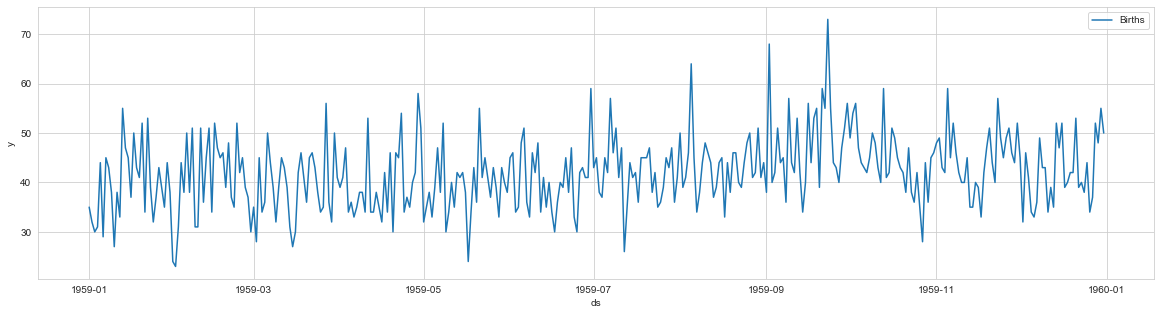

In [24]:
sns.lineplot(x='ds',y='y',data=df2,label='Births')

In [43]:
len(df2)

365

In [44]:
len(df2)-30

335

In [45]:
train = df2.iloc[:335]
test = df2.iloc[335:]

In [46]:
train

,ds,y
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44
...,...,...
330,1959-11-27,51
331,1959-11-28,46
332,1959-11-29,44
333,1959-11-30,52


In [51]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=30,freq='D')

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [52]:
forecast=m.predict(future)

In [53]:
future.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 1 columns):
ds    365 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 3.0 KB


In [54]:
forecast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 16 columns):
ds                            365 non-null datetime64[ns]
trend                         365 non-null float64
yhat_lower                    365 non-null float64
yhat_upper                    365 non-null float64
trend_lower                   365 non-null float64
trend_upper                   365 non-null float64
additive_terms                365 non-null float64
additive_terms_lower          365 non-null float64
additive_terms_upper          365 non-null float64
weekly                        365 non-null float64
weekly_lower                  365 non-null float64
weekly_upper                  365 non-null float64
multiplicative_terms          365 non-null float64
multiplicative_terms_lower    365 non-null float64
multiplicative_terms_upper    365 non-null float64
yhat                          365 non-null float64
dtypes: datetime64[ns](1), float64(15)
memory usage: 45.8 KB


In [56]:
test.head()

,ds,y
335,1959-12-02,32
336,1959-12-03,46
337,1959-12-04,41
338,1959-12-05,34
339,1959-12-06,33


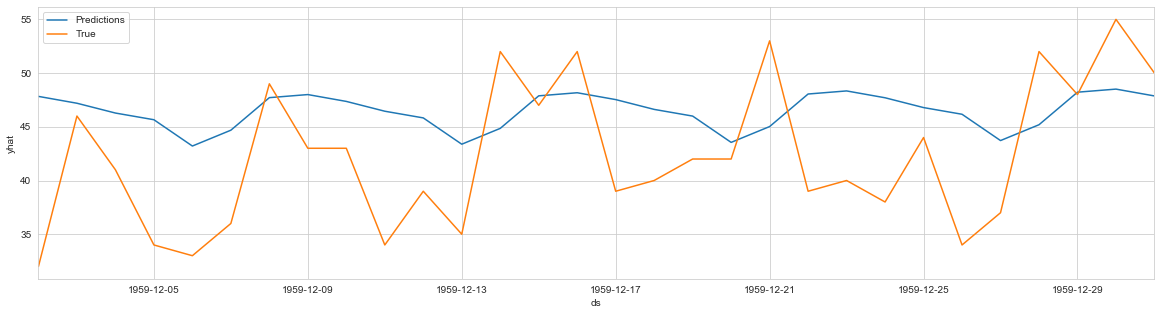

In [57]:
from pandas import Timestamp

forecast['ds']=pd.to_datetime(forecast['ds'])
test['ds']=pd.to_datetime(test['ds'])

# Plot the forecast predictions using seaborn
sns.lineplot(x='ds', y='yhat', data=forecast, label='Predictions')

# Plot the true miles from the test set using seaborn
sns.lineplot(x='ds', y='y', data=test, label='True')

# Set the x-axis limits
plt.xlim(Timestamp('1959-12-02'), Timestamp('1959-12-31'))

# Set the legend
plt.legend()

# Show the plot
plt.show()

In [58]:

from statsmodels.tsa.seasonal import seasonal_decompose

In [65]:

df3=df2.copy()
df3.set_index('ds', inplace=True)

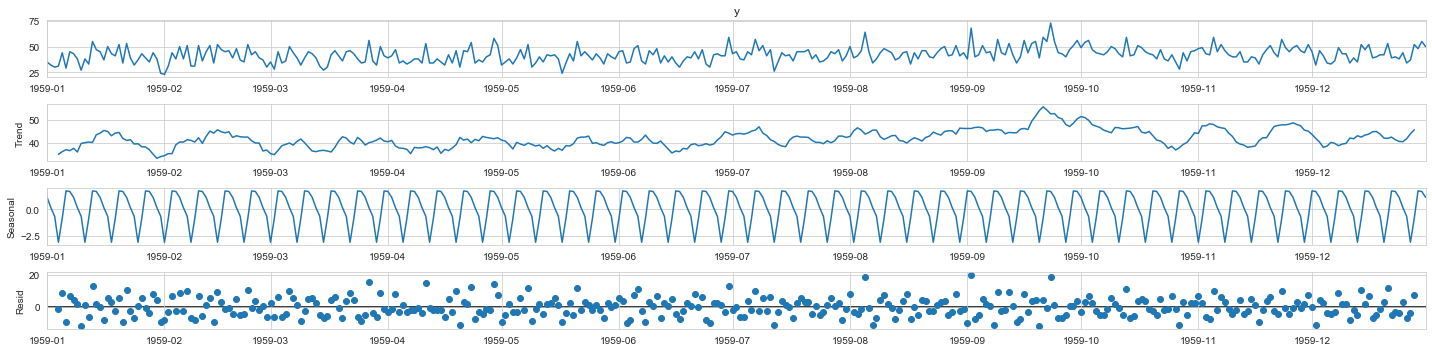

In [67]:
seasonal_decompose(df3['y']).plot();

In [75]:
m = Prophet(seasonality_mode='additive', 
            yearly_seasonality=True,
            weekly_seasonality=True,
            daily_seasonality=False)
m.fit(train)
future = m.make_future_dataframe(periods=30,freq='D')
forecast=m.predict(future)

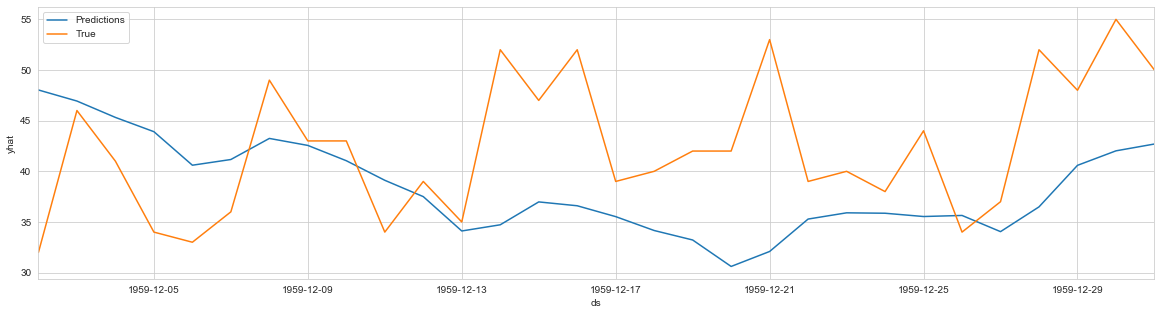

In [76]:
from pandas import Timestamp

forecast['ds']=pd.to_datetime(forecast['ds'])
test['ds']=pd.to_datetime(test['ds'])

# Plot the forecast predictions using seaborn
sns.lineplot(x='ds', y='yhat', data=forecast, label='Predictions')

# Plot the true miles from the test set using seaborn
sns.lineplot(x='ds', y='y', data=test, label='True')

# Set the x-axis limits
plt.xlim(Timestamp('1959-12-02'), Timestamp('1959-12-31'))

# Set the legend
plt.legend()

# Show the plot
plt.show()

In [81]:
# Create the Prophet model with seasonality settings and additional regressors
m = Prophet(
    seasonality_mode='additive',
    yearly_seasonality='auto',
    weekly_seasonality='auto',
    daily_seasonality='auto',
    changepoint_prior_scale=0.05,  # Fine-tune changepoint prior scale
    seasonality_prior_scale=10   
)

# Add custom seasonality components if needed
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.add_seasonality(name='weekly', period=7, fourier_order=3)  

# Fit the model to the training data
m.fit(train)

# Create future dataframe for forecasting
future = m.make_future_dataframe(periods=30, freq='D')

# Generate the forecast
forecast = m.predict(future)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


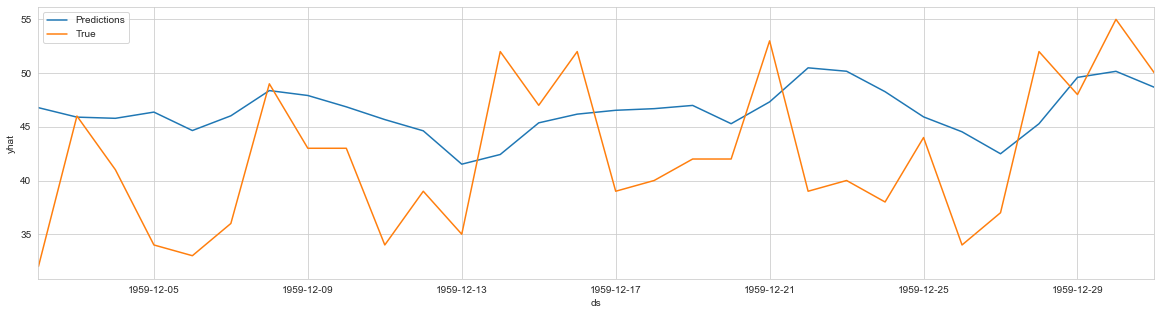

In [82]:
from pandas import Timestamp

forecast['ds']=pd.to_datetime(forecast['ds'])
test['ds']=pd.to_datetime(test['ds'])

# Plot the forecast predictions using seaborn
sns.lineplot(x='ds', y='yhat', data=forecast, label='Predictions')

# Plot the true miles from the test set using seaborn
sns.lineplot(x='ds', y='y', data=test, label='True')

# Set the x-axis limits
plt.xlim(Timestamp('1959-12-02'), Timestamp('1959-12-31'))

# Set the legend
plt.legend()

# Show the plot
plt.show()

# Hyperparameter Tuning

In [86]:
from sklearn.model_selection import ParameterGrid

def evaluate(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred)/y_true))*100
    
param_grid = {
    'seasonality_mode': ['additive', 'multiplicative'],
    'yearly_seasonality': [True, False],
    'weekly_seasonality': [True, False],
    'daily_seasonality': [True, False],
    'changepoint_prior_scale': [0.01, 0.1, 1.0],
    'seasonality_prior_scale': [0.01, 0.1, 1.0]
}

grid = list(ParameterGrid(param_grid))

best_score = float('inf')
best_params = {}

for params in grid:

    m = Prophet(**params)
    m.fit(train)
    forecast = m.predict(future)
    score = evaluate(df2['y'], forecast['yhat'])
    if score < best_score:
        best_score = score
        best_params = params
        
print("Best hyperparameters:", best_params)

Best hyperparameters: {'changepoint_prior_scale': 1.0, 'daily_seasonality': False, 'seasonality_mode': 'additive', 'seasonality_prior_scale': 0.1, 'weekly_seasonality': True, 'yearly_seasonality': True}


In [87]:
# Create the Prophet model with seasonality settings and additional regressors
m = Prophet(
    seasonality_mode='additive',
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    changepoint_prior_scale=1.0,  
    seasonality_prior_scale=0.1   
)

# Add custom seasonality components if needed
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)
m.add_seasonality(name='weekly', period=7, fourier_order=3)  

# Fit the model to the training data
m.fit(train)

# Create future dataframe for forecasting
future = m.make_future_dataframe(periods=30, freq='D')

# Generate the forecast
forecast = m.predict(future)

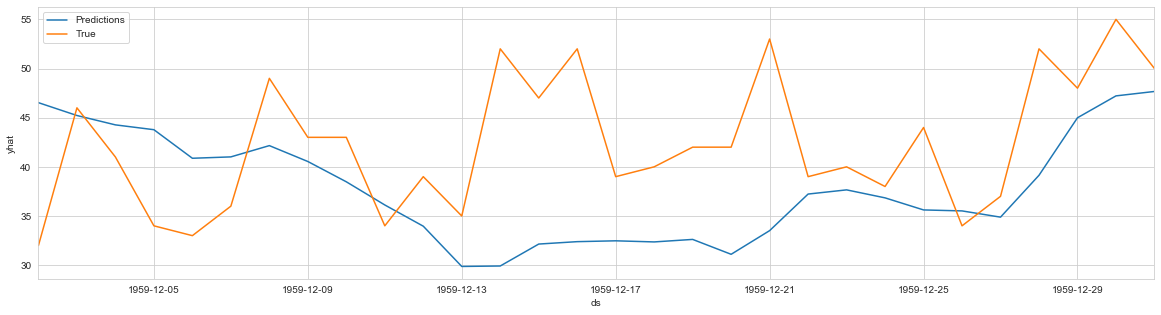

In [88]:
from pandas import Timestamp

forecast['ds']=pd.to_datetime(forecast['ds'])
test['ds']=pd.to_datetime(test['ds'])

# Plot the forecast predictions using seaborn
sns.lineplot(x='ds', y='yhat', data=forecast, label='Predictions')

# Plot the true miles from the test set using seaborn
sns.lineplot(x='ds', y='y', data=test, label='True')

# Set the x-axis limits
plt.xlim(Timestamp('1959-12-02'), Timestamp('1959-12-31'))

# Set the legend
plt.legend()

# Show the plot
plt.show()

# Airline Passenger Data

In [89]:
df=pd.read_csv('Data/airline_passengers.csv')
df.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month                      144 non-null object
Thousands of Passengers    144 non-null int64
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [91]:
df['Month']=pd.DatetimeIndex(df['Month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
Month                      144 non-null datetime64[ns]
Thousands of Passengers    144 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


In [92]:
df.columns=['ds','y']
df.head()

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


Text(0.5, 0, 'Date')

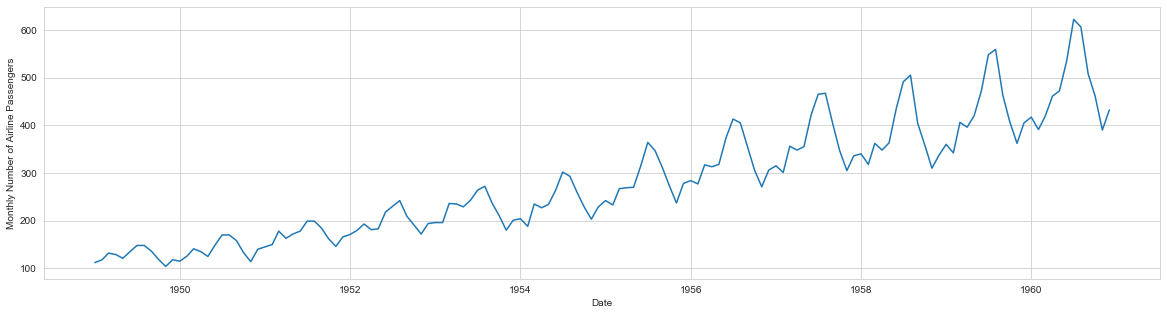

In [96]:
ax=sns.lineplot(data=df, x="ds", y="y")
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')

In [98]:
# set the uncertainty interval to 95% (the Prophet default is 80%)
my_model = Prophet(interval_width=0.95)

In [99]:
my_model.fit(df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [102]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.head()

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01


In [103]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,1949-01-01,84.378677,41.122490,128.679823
1,1949-02-01,77.786826,29.731699,123.488415
2,1949-03-01,109.994541,66.893378,152.947215
3,1949-04-01,107.446903,63.752329,151.961222
4,1949-05-01,110.934953,64.995721,155.548762


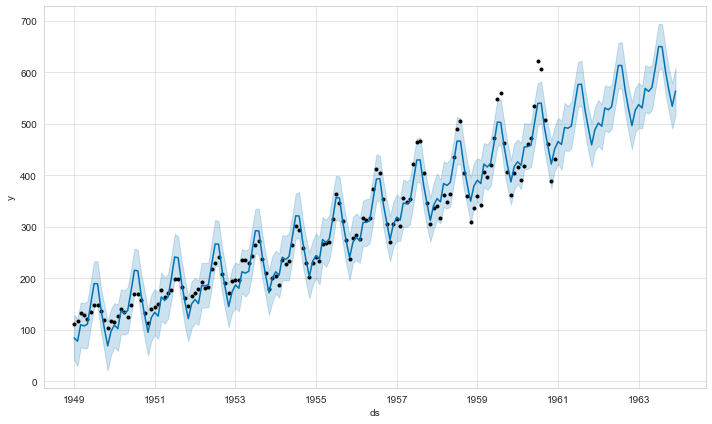

In [105]:
my_model.plot(forecast, uncertainty=True);

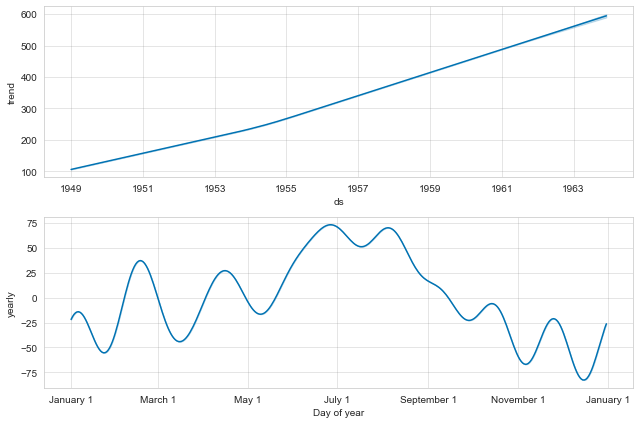

In [107]:
my_model.plot_components(forecast);